# Download model variables

Download as raster layers covering your study area envelope, including:

- At least one **soil** variable from the [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/) (**find thresholds**)
    - [POLARIS: 30-meter probabilistic soil series map of contiguous US](https://pubs.usgs.gov/publication/70170912)
    - <https://scholars.duke.edu/publication/1381493>
    - <https://gee-community-catalog.org/projects/polaris/>
    - NW Chaney et al. (2019) POLARIS Soil Properties: 30-m Probabilistic Maps of Soil Properties Over the Contiguous United States. [DOI: 10.1029/2018WR022797](https://doi.org/10.1029/2018WR022797)
    - Elsa Culler EarthLab Videos
        - [Accessing and formatting URLS for POLARIS data](https://cuboulder.zoom.us/rec/share/imhCGJcrCgSoE1cJjg02r86GMNjiRz0jwVMJ5c0uWNwBCD5D_0kLSl3CaqLdDI2a.ucGta1EEAiirDUop)
        - [Looping through multiple tiles of POLARIS data](https://cuboulder.zoom.us/rec/share/3S7pGOSv7jztZTvg4RSXLj-GicnHwusIDIEDoETZbUN7ivkc6Ryi5GAJyX9Ly6h2.VXl6iFmLChjjUyOg)
- Elevation from the SRTM (available from the [earthaccess API](https://github.com/nsidc/earthaccess/))
- At least one **climate** variable from the [MACAv2 THREDDS data server](http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html).
    - Pick 2 of these
    - [GeoNetwork](https://docs.geonetwork-opensource.org/4.2/):
[THREDDS Harvesting](https://docs.geonetwork-opensource.org/4.2/user-guide/harvesting/harvesting-thredds/)

## POLARIS Dataset

Considering `sand` percentage `mean`. POLARIS data are available at 6 depths, and Bluestem has roots down to 5 feet (150 cm), which is the lowest strata measured (100-200 cm). Data in the
[sand 100-200 cm directory](http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/100_200/)
are saved as separate tif files by longitude.
Buvvalo Gap National Grassland is at (centroid) 43.4375° N, 103.0505° W, while Oglala National Grassland is at 42.9404° N, 103.5900° W. That probably suggests

- [lat4344_lon-103-102.tif](http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/100_200/lat4344_lon-103-102.tif) (33M)
- [lat4344_lon-104-103.tif](http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/100_200/lat4344_lon-104-103.tif) (33M)

In [1]:
pip install --quiet ~/Documents/GitHub/landmapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from landmapy.habitat import create_data_dir

data_dir = create_data_dir('habitat')
data_dir

'/Users/brianyandell/earth-analytics/data/habitat'

### Single POLARIS TIFF

In [3]:
soil_url = (
    "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/"
    "sand/"
    "mean/"
    "100_200/"
    "lat4344_lon-105-104.tif"
)
soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/mean/100_200/lat4344_lon-105-104.tif'

In [4]:
import rioxarray as rxr

soil_da = rxr.open_rasterio(
    soil_url,
    mask_and_scale=True
).squeeze()
soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
  * y            (y) float64 29kB 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

In [202]:
#soil_da.plot()

### Multiple POLARIS TIFFs

Get boundary for study. Fake Denver for now.
Determine `lat` and `lon` based on site.
Set up `for` loop.

Code below is for `soil_var="sand"`. We also want to do `soil_var="ph"`.

In [3]:
%store -r buffalo_gdf
print(buffalo_gdf.total_bounds)
#buffalo_gdf.plot()

[-104.05473027   42.74093601 -101.47233564   43.99459902]


Download URL list from `buffalo_gdf` and merge into DataArray `buffalo_da` with `merge_soil()`.
This also bounds `buffalo_da` based on `buffalo_gdf`.

In [11]:
%store -r buffalo_da
try:
    buffalo_da
except NameError:
    from landmapy.habitat import merge_soil

    buffalo_da = merge_soil(buffalo_gdf)
    %store buffalo_da
    print("buffalo_da created and stored")
else:
    print("buffalo_da already exists")

buffalo_da already exists


Changes desired for plot below:

- Different colors by grassland.
- crop to bounding box (with extra).

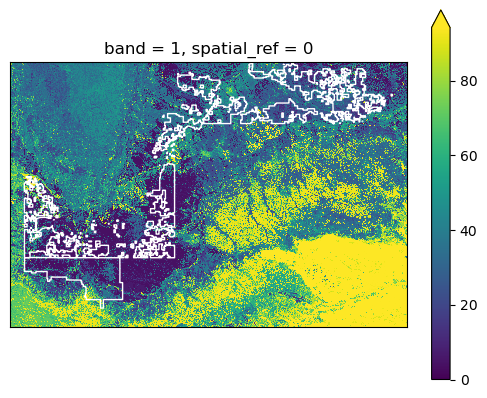

In [12]:
from landmapy.index import redline_over_index

redline_over_index(buffalo_gdf, buffalo_da, edgecolor="white")

## Get MACA and SRTM data

- At least one **climate** variable from the [MACAv2 THREDDS data server](http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html).
- See [EDA Lesson 3. How to Download MACA2 Climate Data Using Python](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/get-maca-2-climate-data-netcdf-python/).
- [CONUS Page](http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/BNU-ESM/catalog.html?dataset=REACCHDatasetScan_BNU-ESM_MACAV2/macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2026_2030_CONUS_monthly.nc)
- [OPENDAP](http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2026_2030_CONUS_monthly.nc)
http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2026_2030_CONUS_monthly.nc.html
- Scenarios:
Consider climate variables air termperature or precipitation (`_pr_`) with OPENDAP
    - monthly data
    - 5-year interval (2026-30) 
    - RCP45 (current) vs RCP85 (high)
- 

In [14]:
from landmapy.habitat import process_maca

maca_df = process_maca({'buffalo': buffalo_gdf})

In [15]:
maca_df[['site_name', 'scenario', 'climate', 'year']]

,site_name,scenario,climate,year
0,buffalo,pr,rcp85,2026
1,buffalo,pr,rcp45,2026


### Plot MACA

Now what I want to do is be able to plot each of the MACA images.
Borrowing heavily from
[Hannah Rieder Step 3](https://github.com/hanried/habitat-suitability/blob/main/03-habitat-suitability-climate.ipynb).

In [25]:
from landmapy.habitat import maca_year
from landmapy.index import redline_over_index

Year 2026, RCP85, precipitation.

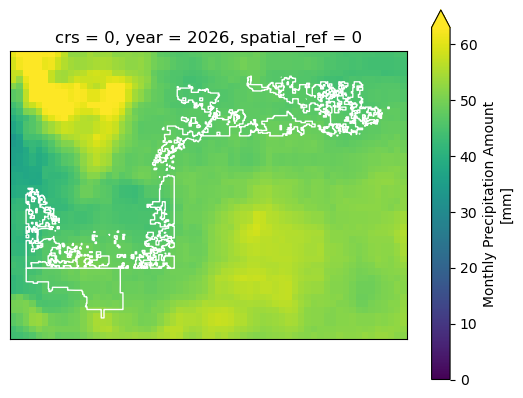

In [27]:
maca_2027 = maca_year(maca_df, 0, 2027)
redline_over_index(buffalo_gdf, maca_2027, edgecolor="white")

Year 2026, RCP45, precipitation.

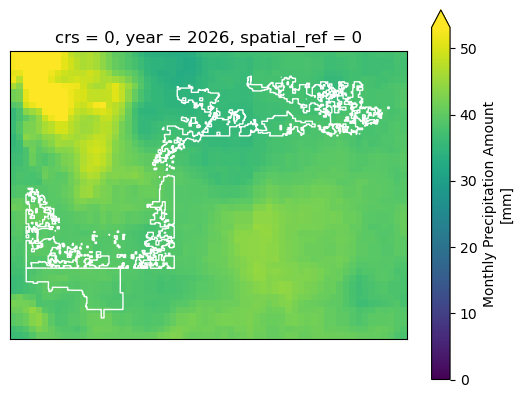

In [28]:
redline_over_index(buffalo_gdf, maca_year(maca_df, 1, 2027), edgecolor="white")

### Extra Stuff

Below are ideas not implemented.

In [ ]:
# %run srtm.py

## Harmonize Data

Make sure to reproject so all grids line up.